# Portfolio Optimization

Esse notebook irá apresentar um carteira de investimentos otimizada usando como base a teoria de Markowitz. Para isso, iremos utilizar os dados dos preços de ações disponibilizados no site da BOVESPA. 

Background: rodar o notebook criacao_dataframe_estruturado2 que conterá os dados das ações em 2018 (esse código será evoluido para os dados de 1995 até 2019). O mesmo código pode ser executado em julia em csv_pivotado.jl. Os dataframes também estão disponiveis na nossa pasta no drive

***Pontos importantes sobre o dataframe***: a base de dados original, não estruturada, continha preços de uma mesma ação, em um mesmo dia, porém com valores diferentes. Como nossa análise leva em consideração a variação do preço das ações por dia, essa duplicação não pode acontecer. Analisando os dados percebemos que ao fixar um valor no campo TPMERC (tipo de mercado) essa duplicação deixava de existir. Portando assumimos que para cada tipo de mercado, uma ação pode vir a ter valores diferentes. Fizemos essa escolha baseados em uma suposição e escolhemos o mercado aleatoriamente. Seria interessante revisarmos se essa suposição é válida e se o mercado escolhido é o correto (tudo isso está no notebook criacao_dataframe_estruturado2)

In [100]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import random

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# dataframe pivotado
table = pd.read_pickle(r"dataframe_estruturado2")

In [4]:
table

,AALL34,AALR3,AAPL34,ABBV34,ABCB10,ABCB2,ABCB4,ABCP11,ABEV3,ABTT34,...,WUNI34,XBOV11,XPCM11,XPIN11,XPLG11,XPML11,XPML12,XPOM11,XRXB34,XTED11
DATA,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,1489.0,5630.0,0.0,0.0,420.0,1658.0,1600.0,2169.0,0.0,...,0.0,7700.0,9756.0,0.0,0.0,10140.0,0.0,9900.0,0.0,2678.0
2018-01-03,0.0,1496.0,5625.0,32410.0,0.0,421.0,1665.0,1599.0,2174.0,4780.0,...,0.0,7708.0,9810.0,0.0,0.0,10170.0,0.0,9905.0,0.0,2678.0
2018-01-04,17126.0,1509.0,5618.0,32377.0,0.0,426.0,1660.0,1599.0,2162.0,4760.0,...,6272.0,7779.0,9830.0,0.0,0.0,10170.0,0.0,10100.0,9628.0,2680.0
2018-01-05,0.0,1505.0,5680.0,32540.0,0.0,435.0,1684.0,1590.0,2170.0,4770.0,...,6357.0,0.0,9825.0,0.0,0.0,10246.0,0.0,9908.0,9654.0,2689.0
2018-01-08,0.0,1479.0,5664.0,32230.0,0.0,451.0,1700.0,1590.0,2166.0,4770.0,...,0.0,7847.0,9835.0,0.0,0.0,10590.0,0.0,10000.0,9726.0,2685.0
2018-01-09,0.0,1465.0,5690.0,0.0,0.0,447.0,1704.0,1585.0,2160.0,0.0,...,6878.0,7793.0,9855.0,0.0,0.0,10600.0,0.0,9950.0,9867.0,2694.0
2018-01-10,0.0,1440.0,5636.0,0.0,0.0,470.0,1710.0,1575.0,2160.0,4770.0,...,0.0,7728.0,9855.0,0.0,0.0,10550.0,0.0,10000.0,0.0,2690.0
2018-01-11,0.0,1459.0,5661.0,31980.0,0.0,491.0,1736.0,1575.0,2185.0,4750.0,...,0.0,7848.0,9850.0,0.0,0.0,10600.0,0.0,9980.0,0.0,2690.0
2018-01-12,0.0,1450.0,5700.0,32210.0,0.0,480.0,1725.0,1580.0,2160.0,4750.0,...,0.0,7840.0,9834.0,0.0,0.0,10540.0,0.0,10000.0,0.0,2683.0


In [5]:
(table == 0).any(axis=0)

AALL34      True
AALR3      False
AAPL34      True
ABBV34      True
ABCB10      True
ABCB2       True
ABCB4      False
ABCP11     False
ABEV3      False
ABTT34      True
ACNB34      True
ADHM3       True
AEFI11     False
AELP3       True
AETB34      True
AFLT3       True
AGCX11     False
AGRO3      False
AHEB3       True
AHEB6       True
AIGB34      True
ALMI11     False
ALPA3       True
ALPA4      False
ALSC3      False
ALUP11     False
ALUP3       True
ALUP4       True
ALZR11      True
AMAR3      False
           ...  
VLOL11      True
VOTS11      True
VRTA11     False
VTLT11      True
VULC3      False
VVAR11      True
VVAR3      False
VVAR4       True
WALM34      True
WEGE3      False
WFCO34      True
WHRL3       True
WHRL4       True
WIZS3      False
WLMM3       True
WLMM4       True
WPLZ11      True
WPLZ11B     True
WSON33      True
WTSP11B     True
WUNI34      True
XBOV11      True
XPCM11     False
XPIN11      True
XPLG11      True
XPML11     False
XPML12      True
XPOM11      Tr

In [6]:
table = table.loc[:, ((table == 0).any(axis=0)==False)]

In [7]:
# Arrumar erro do dataset
table = table/100
table

,AALR3,ABCB4,ABCP11,ABEV3,AEFI11,AGCX11,AGRO3,ALMI11,ALPA4,ALSC3,...,VIVT3,VIVT4,VLID3,VRTA11,VULC3,VVAR3,WEGE3,WIZS3,XPCM11,XPML11
DATA,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14.89,16.58,16.00,21.69,158.37,1252.06,12.67,1785.00,17.60,18.05,...,41.40,49.01,19.20,110.00,9.29,7.71,25.02,12.15,97.56,101.40
2018-01-03,14.96,16.65,15.99,21.74,158.23,1282.00,12.66,1785.00,17.17,18.16,...,40.20,48.42,19.49,110.99,9.75,7.75,24.64,12.05,98.10,101.70
2018-01-04,15.09,16.60,15.99,21.62,158.27,1300.00,13.07,1785.00,17.15,18.13,...,40.64,49.40,19.49,110.95,10.00,7.81,24.40,11.95,98.30,101.70
2018-01-05,15.05,16.84,15.90,21.70,159.00,1296.00,13.34,1798.99,17.45,18.05,...,40.74,49.63,19.45,110.50,10.00,7.56,24.50,12.12,98.25,102.46
2018-01-08,14.79,17.00,15.90,21.66,159.00,1293.00,13.40,1810.50,17.10,17.99,...,41.17,50.01,19.40,110.70,10.05,7.69,24.70,12.07,98.35,105.90
2018-01-09,14.65,17.04,15.85,21.60,159.38,1275.00,13.20,1840.00,17.22,17.88,...,41.06,50.66,19.15,110.69,10.10,7.73,25.10,11.93,98.55,106.00
2018-01-10,14.40,17.10,15.75,21.60,159.99,1285.00,13.13,1821.01,16.75,17.67,...,40.54,49.36,18.85,110.16,10.14,7.53,24.90,12.13,98.55,105.50
2018-01-11,14.59,17.36,15.75,21.85,159.90,1277.11,13.33,1890.00,16.73,17.93,...,42.17,49.50,18.92,110.80,10.40,7.75,25.38,12.30,98.50,106.00
2018-01-12,14.50,17.25,15.80,21.60,161.01,1279.50,13.28,1859.99,17.11,17.90,...,41.79,50.36,18.49,111.23,10.39,7.75,25.57,11.99,98.34,105.40


Obter a variação por dia dos preços das ações

In [8]:
variacao_de_precos_por_acao = table.copy()

# Para cada acao
for acao in table.columns:
    
    preco_anterior = table[acao][0] # Salva o preco do dia anterior
    
    # Para cada dia
    for dia in range( 1, len(table[acao]) ):
        preco_atual = table[acao][dia] # Salva o preco atual
        variacao_de_precos_por_acao[acao][dia] = preco_atual - preco_anterior # Calcula e salva a variacao
        preco_anterior = preco_atual # Atualiza o preco anterior para o atual

variacao_de_precos_por_acao

,AALR3,ABCB4,ABCP11,ABEV3,AEFI11,AGCX11,AGRO3,ALMI11,ALPA4,ALSC3,...,VIVT3,VIVT4,VLID3,VRTA11,VULC3,VVAR3,WEGE3,WIZS3,XPCM11,XPML11
DATA,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14.89,16.58,16.00,21.69,158.37,1252.06,12.67,1785.00,17.60,18.05,...,41.40,49.01,19.20,110.00,9.29,7.71,25.02,12.15,97.56,101.40
2018-01-03,0.07,0.07,-0.01,0.05,-0.14,29.94,-0.01,0.00,-0.43,0.11,...,-1.20,-0.59,0.29,0.99,0.46,0.04,-0.38,-0.10,0.54,0.30
2018-01-04,0.13,-0.05,0.00,-0.12,0.04,18.00,0.41,0.00,-0.02,-0.03,...,0.44,0.98,0.00,-0.04,0.25,0.06,-0.24,-0.10,0.20,0.00
2018-01-05,-0.04,0.24,-0.09,0.08,0.73,-4.00,0.27,13.99,0.30,-0.08,...,0.10,0.23,-0.04,-0.45,0.00,-0.25,0.10,0.17,-0.05,0.76
2018-01-08,-0.26,0.16,0.00,-0.04,0.00,-3.00,0.06,11.51,-0.35,-0.06,...,0.43,0.38,-0.05,0.20,0.05,0.13,0.20,-0.05,0.10,3.44
2018-01-09,-0.14,0.04,-0.05,-0.06,0.38,-18.00,-0.20,29.50,0.12,-0.11,...,-0.11,0.65,-0.25,-0.01,0.05,0.04,0.40,-0.14,0.20,0.10
2018-01-10,-0.25,0.06,-0.10,0.00,0.61,10.00,-0.07,-18.99,-0.47,-0.21,...,-0.52,-1.30,-0.30,-0.53,0.04,-0.20,-0.20,0.20,0.00,-0.50
2018-01-11,0.19,0.26,0.00,0.25,-0.09,-7.89,0.20,68.99,-0.02,0.26,...,1.63,0.14,0.07,0.64,0.26,0.22,0.48,0.17,-0.05,0.50
2018-01-12,-0.09,-0.11,0.05,-0.25,1.11,2.39,-0.05,-30.01,0.38,-0.03,...,-0.38,0.86,-0.43,0.43,-0.01,0.00,0.19,-0.31,-0.16,-0.60


Let's first look at how the price of each stock has evolved within give time frame.

Text(0, 0.5, 'Preço em $')

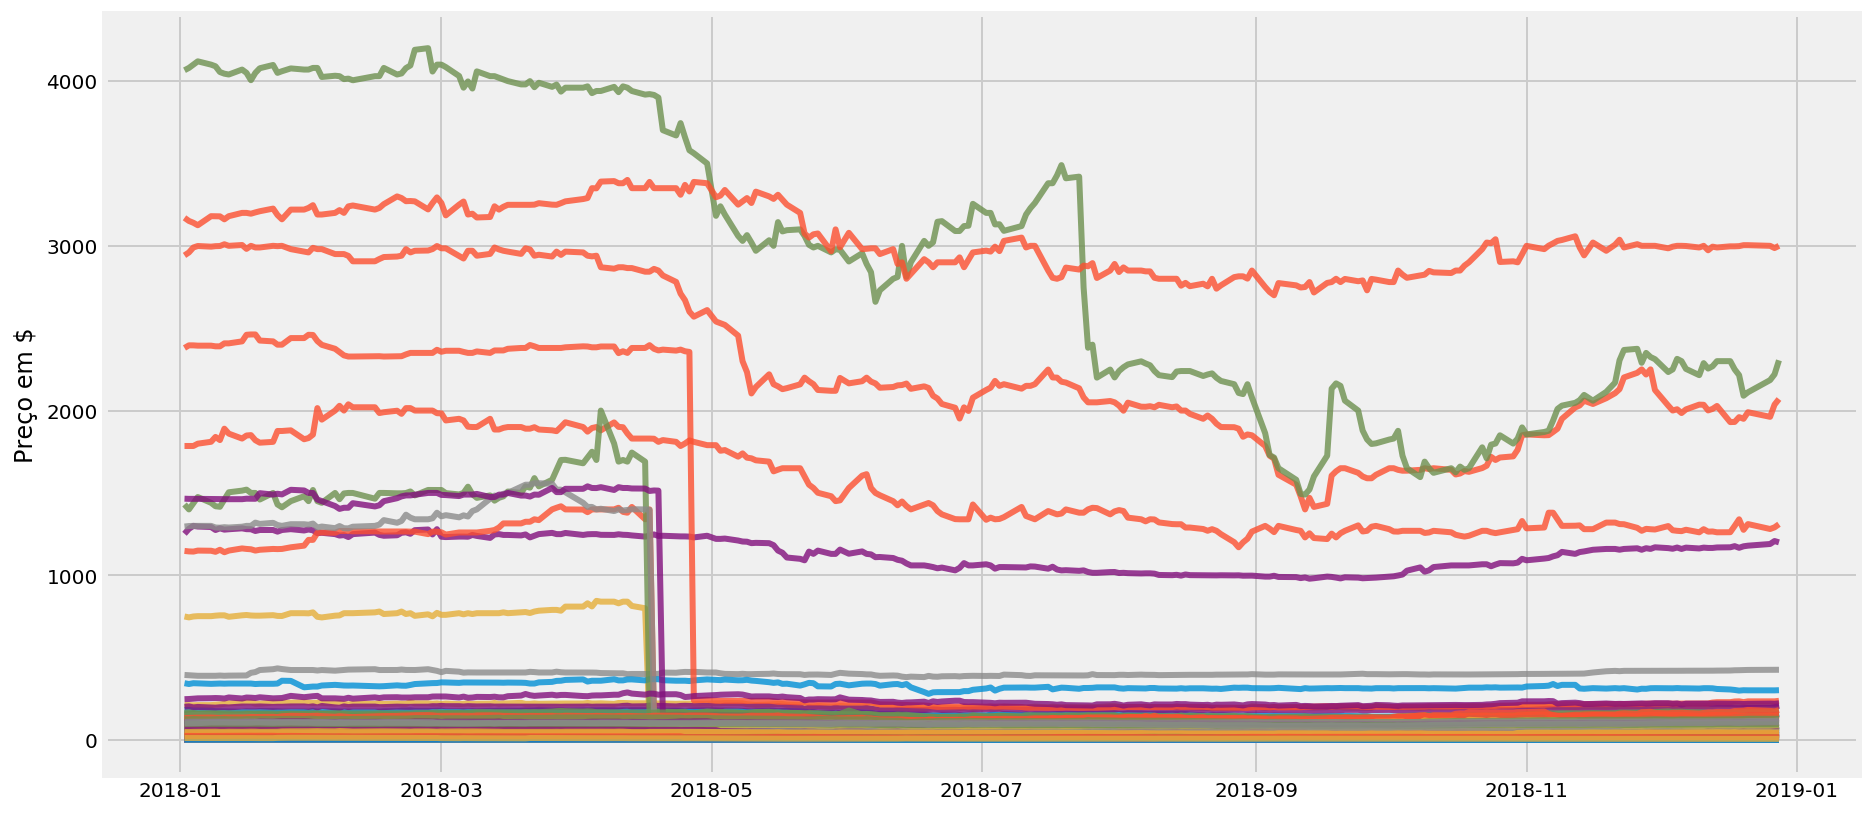

In [8]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
# plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Preço em $')

Gráfico que mostra o retorno diário. A partir dele é possivel observar a volatilidade de cada ação

Text(0, 0.5, 'Retornos diários')

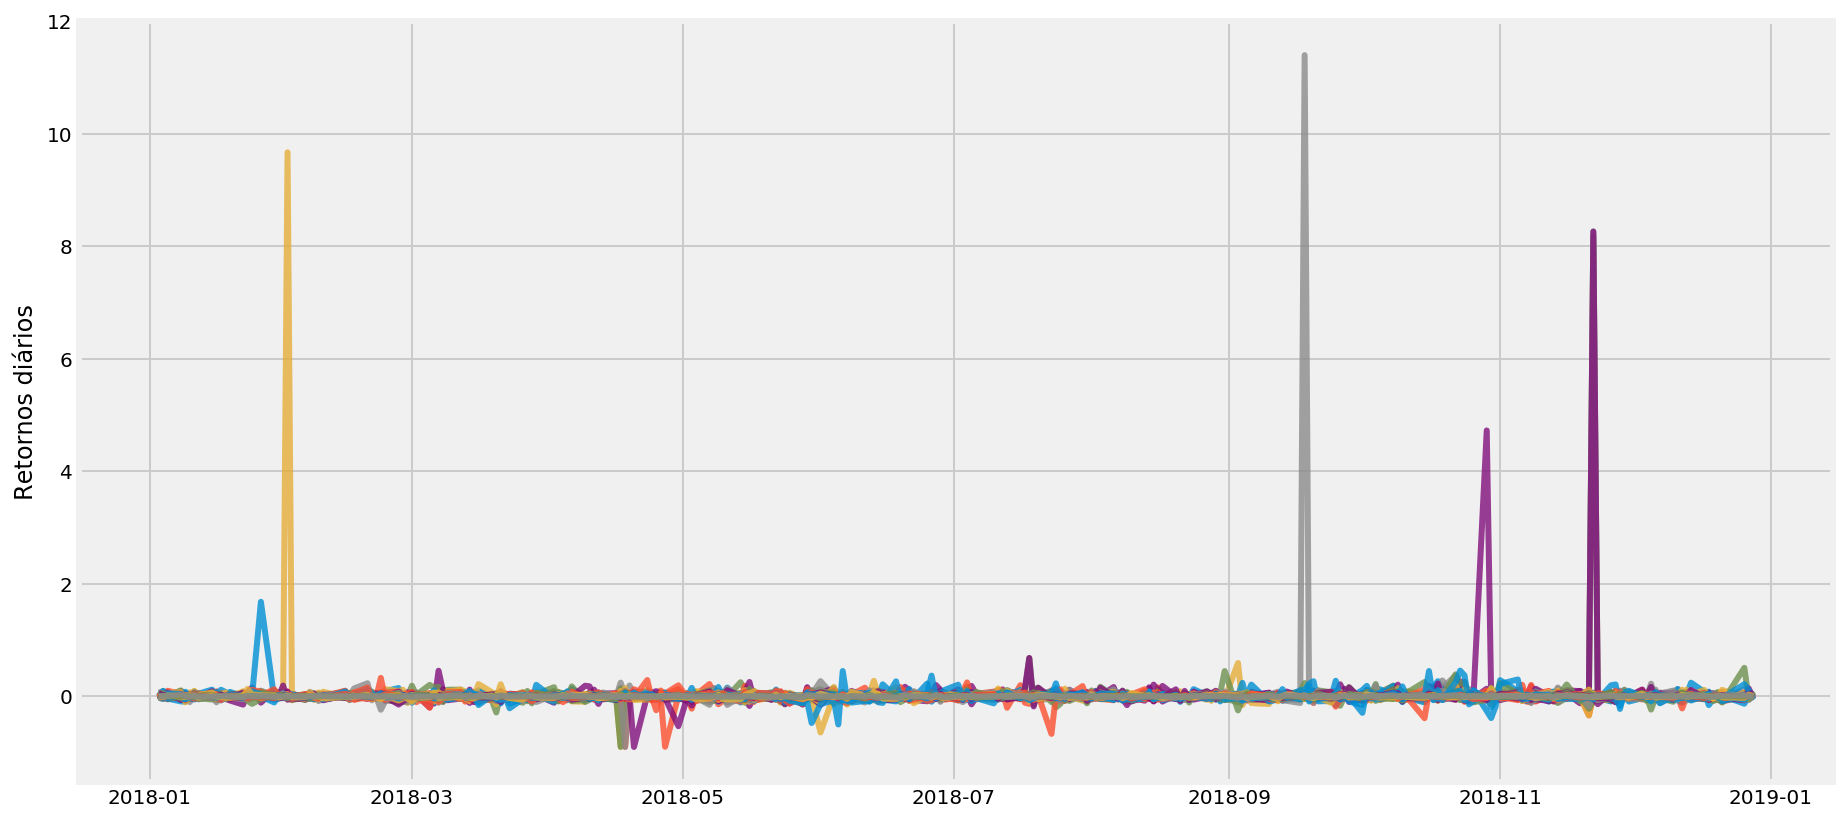

In [9]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
# plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Retornos diários')

## Random Portfolios Generation

Visto que temos muitas ações precisamos decidir qual a porcentagem de dinheiro que iremos investir em cada uma delas. Para isso, iremos gerar diversos portfolios aleátorios e com base no calculo do retorno anual e na volatilidade iremos observar qual o melhor investimento a se fazer. **A SOMA DOS PESOS PARA CADA AÇÃO DEVE SER IGUAL A 1**

A função "portfolio_annual_performance" faz o calculo do retorno e da volatilidade. A valor 252 é utilizado para que a analise seja feita em uma projeção anual, considerando 252 dias uteis ***(analisar se esse número de dias está correto para os nossos dados)***. A função "random_portfolios". Irá gerar vários portfolios com pesos aleátorios para cada ação. O parametro num_portfolios define a quantidade de portfolios aleatorios que desejamos gerar

In [10]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [70]:
def get_only_top_weights():
    '''Atribui pesos aleatorios para todos os ativos
    e seleciona apenas os 10 mais altos'''
    weights = np.random.random(275) #atribui pesos aleatorios para cada acao
    index = np.argsort(weights)[-10:]
    weights_10 = np.zeros(275)
    for i in range(0,10):
        weights_10[index[i]] = weights[index[i]]
    return weights_10

In [103]:
def select_random_stocks_and_weights():
    '''seleciona 10 ativos aleatoriamente e atribui pesos aleatorios a eles'''
    stocks = random.sample(range(275), 10)
    weights = np.random.random(10)
    weights_10 = np.zeros(275)
    for i in range(0,10):
        weights_10[stocks[i]] = weights[i]
    return weights_10

In [116]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = [] #lista para os pesos de cada acao em cada portfolio
    for i in range(num_portfolios):
        weights = select_random_stocks_and_weights()
        weights /= np.sum(weights) #transforma em porcentagem
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev #desvio padrao do portifolio i
        results[1,i] = portfolio_return #retorno do portifolio i
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev #sharpe ratio do portifolio i
    return results, weights_record

You can easily get daily returns by calling pct_change on the data frame with the price data. And the mean daily returns, the covariance matrix of returns are needed to calculate portfolio returns and volatility. Finally, let's generate 25,000 portfolios with random weights assigned to each stock.

In [130]:
returns = table.pct_change() # retorno diario em porcentagem
mean_returns = returns.mean() #media dos retornos diarios
cov_matrix = returns.cov()
num_portfolios = 40000
risk_free_rate = 0.0046

In [131]:
results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

In [15]:
cov_matrix

,AALR3,ABCB4,ABCP11,ABEV3,AEFI11,AGCX11,AGRO3,ALMI11,ALPA4,ALSC3,...,VIVT3,VIVT4,VLID3,VRTA11,VULC3,VVAR3,WEGE3,WIZS3,XPCM11,XPML11
AALR3,0.000252,0.000061,-3.143434e-06,3.037515e-05,1.405491e-05,2.237179e-05,9.161740e-06,0.000051,8.871497e-05,0.000080,...,3.655245e-05,0.000032,0.000067,0.000009,0.000101,0.000082,-1.955176e-06,0.000035,3.835386e-06,-1.011075e-06
ABCB4,0.000061,0.000267,2.471286e-05,4.213774e-05,9.603625e-06,1.672686e-05,4.505525e-05,0.000066,1.014536e-04,0.000138,...,7.187725e-05,0.000080,0.000105,0.000008,0.000127,0.000209,5.865869e-05,0.000037,1.522747e-05,1.225844e-05
ABCP11,-0.000003,0.000025,4.646970e-05,5.341145e-06,1.357372e-05,6.630392e-06,5.204462e-06,0.000007,1.809440e-05,0.000010,...,-1.121953e-06,0.000005,0.000020,0.000002,0.000024,0.000045,6.620331e-06,0.000026,1.261360e-05,6.692443e-06
ABEV3,0.000030,0.000042,5.341145e-06,1.890391e-04,1.571217e-05,9.685909e-06,2.292904e-05,0.000035,8.274839e-05,0.000076,...,5.882942e-05,0.000074,0.000007,0.000003,0.000067,0.000079,5.206459e-05,0.000021,6.231757e-06,1.797139e-06
AEFI11,0.000014,0.000010,1.357372e-05,1.571217e-05,1.760408e-04,2.347898e-05,1.039199e-06,-0.000007,4.354274e-05,0.000035,...,2.388845e-06,0.000011,0.000034,0.000013,0.000031,0.000039,4.639827e-05,0.000008,1.378016e-05,1.509938e-05
AGCX11,0.000022,0.000017,6.630392e-06,9.685909e-06,2.347898e-05,9.198580e-05,1.276541e-05,-0.000017,3.379347e-06,0.000034,...,4.191399e-06,0.000005,0.000031,0.000003,0.000016,0.000020,-2.638604e-06,-0.000028,1.102684e-05,1.309126e-05
AGRO3,0.000009,0.000045,5.204462e-06,2.292904e-05,1.039199e-06,1.276541e-05,1.623142e-04,0.000014,7.533444e-06,0.000039,...,2.976893e-05,0.000018,0.000034,-0.000004,0.000045,0.000110,1.134311e-05,0.000024,1.631830e-05,1.811143e-05
ALMI11,0.000051,0.000066,6.573287e-06,3.490155e-05,-7.046388e-06,-1.688437e-05,1.410075e-05,0.000370,5.047211e-05,0.000020,...,4.265929e-05,0.000016,-0.000014,-0.000004,0.000068,0.000086,2.885223e-06,0.000052,-3.674623e-06,3.160765e-06
ALPA4,0.000089,0.000101,1.809440e-05,8.274839e-05,4.354274e-05,3.379347e-06,7.533444e-06,0.000050,5.875214e-04,0.000175,...,6.263084e-05,0.000078,0.000107,0.000010,0.000234,0.000188,8.438519e-05,0.000076,4.088989e-06,2.868614e-05
ALSC3,0.000080,0.000138,1.023636e-05,7.648631e-05,3.529536e-05,3.400724e-05,3.912397e-05,0.000020,1.749510e-04,0.000374,...,7.377790e-05,0.000081,0.000112,0.000025,0.000205,0.000185,7.387583e-05,0.000048,5.919367e-06,8.403704e-06


A função abaixo gera os portfolios aleatórios e os resultados de retorno, volaticidade, Sharpe Ratio e pesos para os resultados. Com esses valores ela irá representar com uma estrela vermelha o portfolio com o mairo Sharpe Ratio e uma estrela verde para o portfolio com menor volatilidade. Os demais portfolios também serão representados com base no Sharpe Ratio, sendo que quanto mais azul maior o Sharpe Ratio. 

Para os dois portfolios otimizados, baseado no sharpe ratio e na volatilidade, a função irá mostrar a porcentagem de dinheiro alocada para cada ação. 

***O que é o Sharpe Ratio?*** Esse método ajuda a explicar se os lucros advindos da carteira estão relacionados a sorte/ risco excessivo ou a uma boa estratégia de investimento. Isso considera, que apesar de se obter altos lucros, esses só foram realmente bons se obtidos com um nível de risco não excessivo. Sendo assim, quanto maior o Sharpe Ratio melhor seu desempenho ajustado ao risco. Se obtido um índice negativo, isso significa que os riscos são muito altos ou que se espera que o retorno dessa carteira seja negativo. 

***Volatilidade:*** é referente ao desvio que temos sobre o retorno esperado, tanto acima, quanto abaixo.

In [132]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2]) #pega o portfolio com maior sharpe ratio
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0]) #pega o portfolio com menor desvio padrao 
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print("Verificação da alocação do investimento", sum(weights[max_sharpe_idx]))
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    print("Verificação da alocação do investimento", sum(weights[min_vol_idx]))
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [133]:
pd.set_option('display.max_columns', 300)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.2


            AALR3  ABCB4  ABCP11  ABEV3  AEFI11  AGCX11  AGRO3  ALMI11  ALPA4  \
allocation    0.0    0.0     0.0    0.0     0.0     0.0    0.0    6.91    0.0   

            ALSC3  ALUP11  AMAR3  ANIM3  ARZZ3  ATOM3  AZUL4  BBAS3  BBDC3  \
allocation    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

            BBDC4  BBFI11B  BBPO11  BBRC11  BBRK3  BBSE3  BCFF11  BCRI11  \
allocation    0.0      0.0     0.0     0.0    0.0    0.0     0.0     0.0   

            BEEF3  BEES3  BKBR3  BOBR4  BOVA11  BOVV11  BPAC11  BPAN4  BPFF11  \
allocation    0.0    0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   

            BPHA3  BRAP3  BRAP4  BRAX11  BRCR11  BRDT3  BRFS3  BRKM5  BRML3  \
allocation    0.0    0.0    0.0     0.0     0.0    0.0    0.0    0.0    0.0   

            BRPR3  BRSR6  BSE

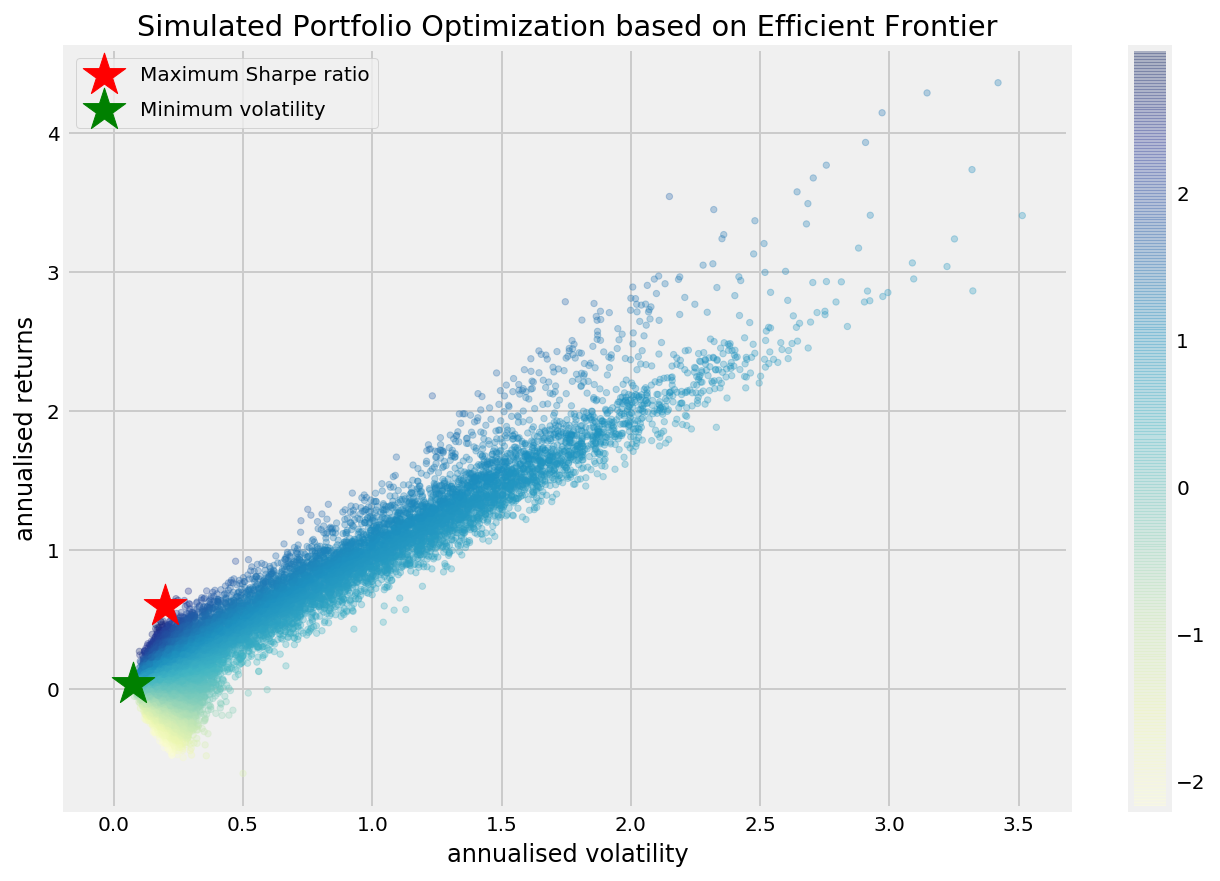

In [134]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Normalmente, quando buscamos um portfolio com o menor risco, as ações que terão maior investimento serão aquelas que apresentam menor volatilidade

Quando aceitamos um risco maior para conseguir um retorno maior, as açoes que nos dão os melhores ***riscos ajustados*** são aquelas com o maior Sharpe Ratio. Provavelmente utilizando ações que apresentem uma maior volatilidade

## Efficient Frontier

From the plot of the randomly simulated portfolio, we can see it forms a shape of an arch line on the top of clustered blue dots. This line is called efficient frontier. Why is it efficient? Because points along the line will give you the lowest risk for a given target return. All the other dots right to the line will give you higher risk with same returns. If the expected returns are the same, why would you take an extra risk when there's an option with lower risk?

The way we found the two kinds of optimal portfolio above was by simulating many possible random choices and pick the best ones (either minimum risk or maximum risk-adjusted return). We can also implement this by using Scipy's optimize function.

If you are an advanced Excel user, you might be familiar with 'solver' function in excel. Scipy's optimize function is doing the similar task when given what to optimize, and what are constraints and bounds.

Below functions are to get the maximum Sharpe ratio portfolio. In Scipy's optimize function, there's no 'maximize', so as an objective function you need to pass something that should be minimized. That is why the first "neg_sharpe_ratio" is computing the negative Sharpe ratio. Now we can use this as our objective function to minimize. In "max_sharpe_ratio" function, you first define arguments (this should not include the variables you would like to change for optimisation, in this case, "weights"). At first, the construction of constraints was a bit difficult for me to understand, due to the way it is stated. 

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

The above constraint is saying that sum of x should be equal to 1. You can think of the 'fun' part construction as '1' on the right side of equal sign has been moved to the left side of the equal sign.

'np.sum(x) == 1' has become 'np.sum(x)-1'

And what does this mean? It simply means that the sum of all the weights should be equal to 1. You cannot allocate more than 100% of your budget in total.

"bounds" is giving another limit to assign random weights, by saying any weight should be inclusively between 0 and 1. You cannot give minus budget allocation to a stock or more than 100% allocation to a stock.

In [15]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

We can also define the optimizing function for calculating minimum volatility portfolio. This time we really do minimize the objective function. What do we want to minimize? We want to minimize volatility by trying different weights. "constraints" and "bounds" are same as the above.

In [16]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

As I already mentioned above we can also draw a line which depicts where the efficient portfolios for a given risk rate should be. This is called "efficient frontier". Below I define other functions to compute efficient frontier. The first function "efficient_return" is calculating the most efficient portfolio for a given target return, and the second function "efficient_frontier" will take a range of target returns and compute efficient portfolio for each return level.

In [17]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

Let's try to plot the portfolio choice with maximum Sharpe ratio and minimum volatility also with all the randomly generated portfolios. But this time we are not picking the optimal ones from the randomly generated portfolios, but we are actually calculating by using Scipy's 'minimize' function. And the below function will also plot the efficient frontier line.

In [18]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    plt.show()

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.57
Annualised Volatility: 0.09


            AALR3  ABCB4  ABCP11  ABEV3  AEFI11  AGCX11  AGRO3  ALMI11  ALPA4  \
allocation    0.0    0.0     0.0    0.0     0.0     0.0    0.0     0.0    0.0   

            ALSC3   ...    VIVT3  VIVT4  VLID3  VRTA11  VULC3  VVAR3  WEGE3  \
allocation    0.0   ...      0.0    0.0    0.0    1.51    0.0    0.0    0.0   

            WIZS3  XPCM11  XPML11  
allocation    0.0     0.0    3.22  

[1 rows x 275 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.05
Annualised Volatility: 0.03


            AALR3  ABCB4  ABCP11  ABEV3  AEFI11  AGCX11  AGRO3  ALMI11  ALPA4  \
allocation    0.0    0.0    4.35   0.59     0.0     0.0    0.0     0.0    0.0   

            ALSC3   ...    VIVT3  VIVT4  VLID3  VRTA11  VULC3  VV

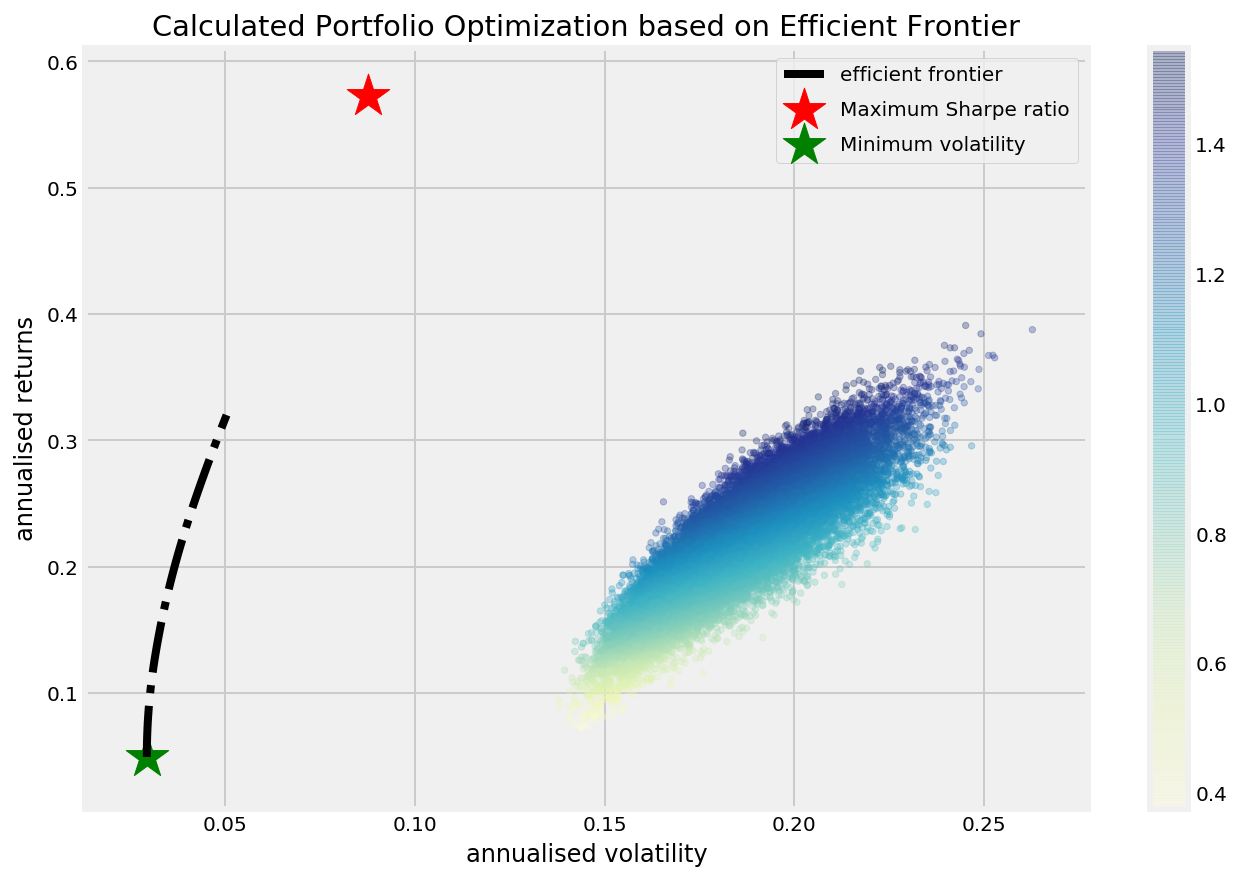

In [19]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

We have almost the same result as what we have simulated by picking from the randomly generated portfolios. The slight difference is that the Scipy's "optimize" function has not allocated any budget at all for Google on maximum Sharpe ratio portfolio, while one we chose from the randomly generated samples has 0.45% of allocation for Google. There are some differences in the decimal places but more or less same.

Instead of plotting every randomly generated portfolio, we can plot each individual stocks on the plot with the corresponding values of each stock's annual return and annual risk. This way we can see and compare how diversification is lowering the risk by optimising the allocation.

In [20]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(246)
    an_rt = mean_returns * 246
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    print( "-"*80)
    print( "Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.57
Annualised Volatility: 0.09


            AALR3  ABCB4  ABCP11  ABEV3  AEFI11  AGCX11  AGRO3  ALMI11  ALPA4  \
allocation    0.0    0.0     0.0    0.0     0.0     0.0    0.0     0.0    0.0   

            ALSC3   ...    VIVT3  VIVT4  VLID3  VRTA11  VULC3  VVAR3  WEGE3  \
allocation    0.0   ...      0.0    0.0    0.0    1.51    0.0    0.0    0.0   

            WIZS3  XPCM11  XPML11  
allocation    0.0     0.0    3.22  

[1 rows x 275 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.05
Annualised Volatility: 0.03


            AALR3  ABCB4  ABCP11  ABEV3  AEFI11  AGCX11  AGRO3  ALMI11  ALPA4  \
allocation    0.0    0.0    4.35   0.59     0.0     0.0    0.0     0.0    0.0   

            ALSC3   ...    VIVT3  VIVT4  VLID3  VRTA11  VULC3  VV

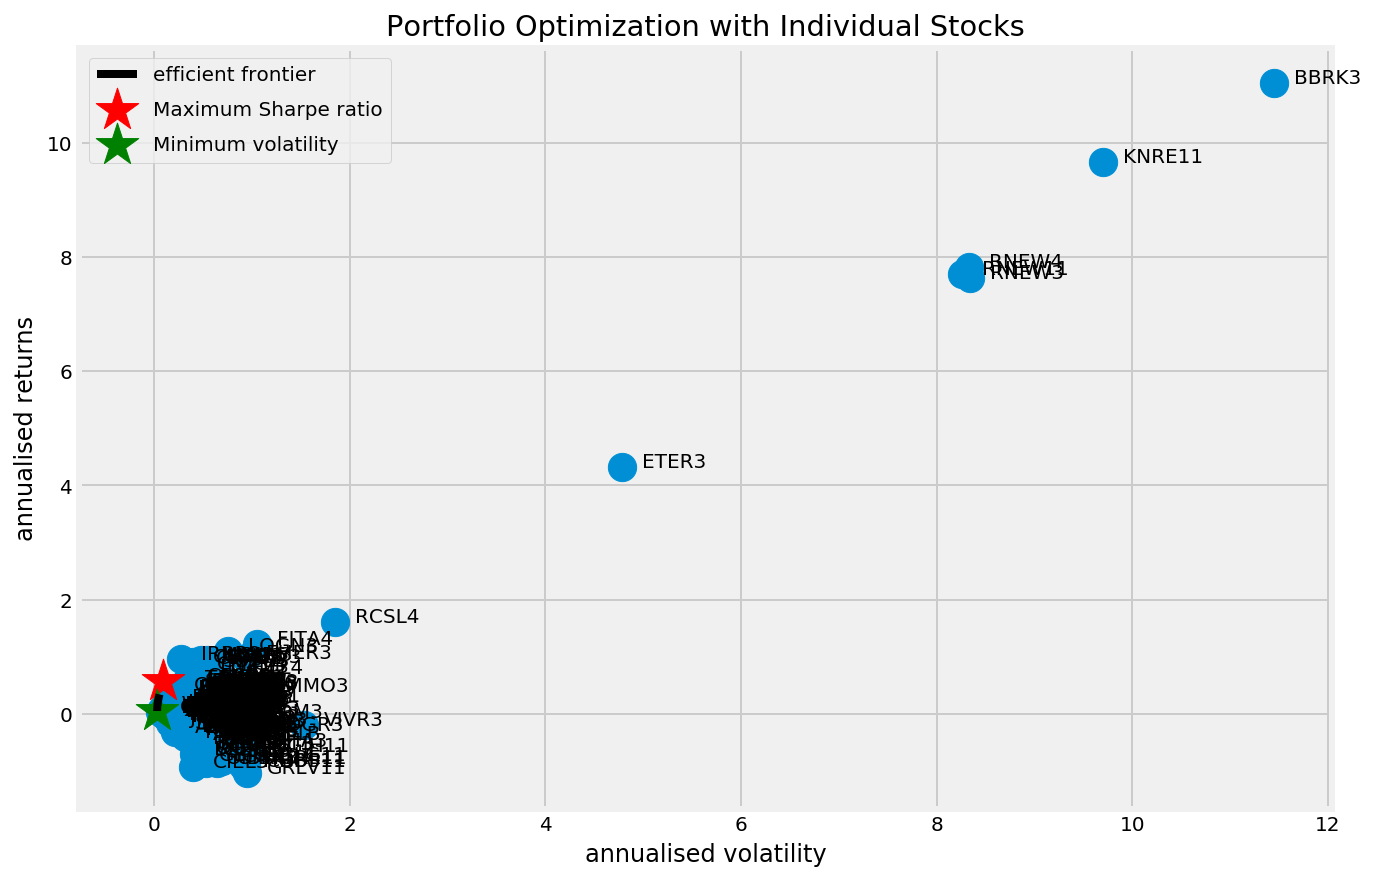

In [21]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

As you can see from the above plot, the stock with the least risk is Google at around 0.18. But with portfolio optimisation, we can achieve even lower risk at 0.16, and still with a higher return than Google. And if we are willing to take slightly more risk at around the similar level of risk of Google, we can achieve a much higher return of 0.30 with portfolio optimization.

Considering how vast and deep the finance field is, I've probably only scratched the surface. But I had fun going through coding and trying to understand the concept. And I'm learning every day. After finishing this implementation, I definitely know better than yesterday's me. And if I keep on going and learning, in about a couple of year's time, I will know a whole lot more than today's me. If you have any comments or questions, feel free to leave a comment. Any feedback would be appreciated.